In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("D:/UTAustin/EIS/CZ-01-050_25LiTFSi_EIS.csv")

In [18]:
df
df.dropna() 
x1 = df['1000/T K']
y1 = df['sigma_heating']
y2 = df['sigma_cooling']

(array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
 <a list of 7 Text yticklabel objects>)

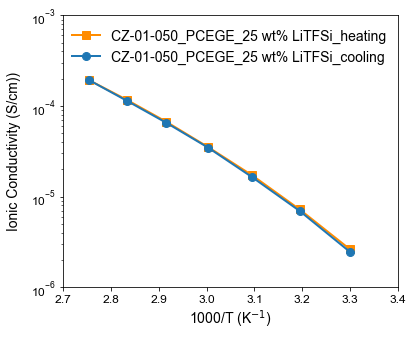

In [19]:
Afont = {'fontname':'Arial'}
plt.figure(figsize = (6,5))
plt.plot(x1, y1, color = 'darkorange', marker = 's', linewidth = 2, markersize = 8, label = 'CZ-01-050_PCEGE_25 wt% LiTFSi_heating')
plt.plot(x1, y2, color = 'tab:blue', marker = 'o', linewidth = 2, markersize = 8, label = 'CZ-01-050_PCEGE_25 wt% LiTFSi_cooling')
plt.xlim(2.7,3.4)
plt.ylim(0.000001,0.001)
plt.yscale('log')
plt.legend(loc = (0.01,0.8), prop = {'family':'Arial', 'size':'14'},frameon = False)
plt.xlabel('1000/T (K'+r'$^{-1}$'+')', **Afont, fontsize = '14')
plt.ylabel('Ionic Conductivity (S/cm))', **Afont, fontsize = '14')
ax = plt.gca()
ax.yaxis.labelpad = 10
plt.xticks(**Afont, fontsize = '12')
plt.yticks(**Afont, fontsize = '12')

In [24]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import math

In [28]:
def func(x, a, b,T):
    return a * np.sqrt(x)*np.exp(b/(x-T))

In [50]:
x = df['temp K']
y1

0    0.000003
1    0.000007
2    0.000017
3    0.000035
4    0.000067
5    0.000117
6    0.000192
Name: sigma_heating, dtype: float64

In [51]:
popt, pcov = curve_fit(func, x, y1)

In [52]:
popt

array([ 2.00759275e-02, -1.27771470e+03,  1.94761455e+02])

In [53]:
pcov

array([[ 2.94375657e-06, -4.50877598e-02, -2.69540319e-03],
       [-4.50877598e-02,  6.91991784e+02,  4.14618549e+01],
       [-2.69540319e-03,  4.14618549e+01,  2.49055503e+00]])

In [54]:
print('R^2: ', r2_score(y1,func(x, *popt)))

R^2:  0.9999985306356559


In [55]:
perr = np.sqrt(np.diag(pcov))

In [56]:
perr

array([1.71573791e-03, 2.63057367e+01, 1.57814924e+00])

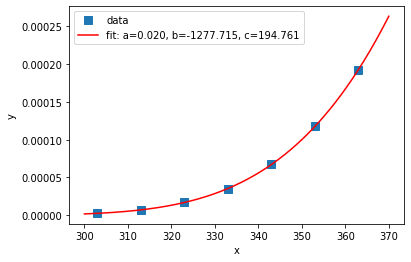

In [58]:
xdata = np.linspace(300, 370, 700)
plt.plot(x, y1, label='data', marker = 's', linewidth = 0, markersize = 8)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()